In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency


In [2]:
df = pd.read_csv('personal_gcash_transaction_2.csv')

df.head(5)

,Date and Time,Description,Reference No.,Debit,Credit,Balance
0,2/2/2025 15:58,STARTING BALANCE,NaN,NaN,426.82,426.82
1,2/2/2025 15:59,Transfer from 09287324237 to 09695514265,3.025310e+12,200.00,NaN,226.82
2,2/4/2025 10:21,"Received GCash from BDO Unibank, Inc. with acc...",NaN,NaN,1000.00,1226.82
3,2/4/2025 10:21,Payment to MLBB,6.083661e+08,94.05,NaN,1132.77
4,2/4/2025 10:22,Payment to MLBB,4.015909e+08,94.05,NaN,1038.72


# Preliminary Exploratory Data Analysis

In [3]:
df.columns

Index(['Date and Time', 'Description', 'Reference No.', 'Debit', 'Credit',
       'Balance'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  255 non-null    object 
 1   Description    255 non-null    object 
 2   Reference No.  242 non-null    float64
 3   Debit          174 non-null    float64
 4   Credit         81 non-null     float64
 5   Balance        255 non-null    float64
dtypes: float64(4), object(2)
memory usage: 12.1+ KB


In [5]:
df.isna().sum().sort_values(ascending=False)


Credit           174
Debit             81
Reference No.     13
Date and Time      0
Description        0
Balance            0
dtype: int64

In [6]:
df.loc[
    df.duplicated(subset="Reference No.", keep=False) &
    df['Reference No.'].notna()
]

,Date and Time,Description,Reference No.,Debit,Credit,Balance
21,2/21/2025 11:48,Transfer from 09473577664 to 09287324237,1.025960e+12,NaN,125.0,387.72
22,2/21/2025 11:49,Transfer from 09473577664 to 09287324237,1.025960e+12,NaN,5.0,392.72
64,5/26/2025 17:11,Transfer from 09287324237 to 09608906763,3.029060e+12,3800.0,NaN,295.12
65,5/26/2025 17:13,Transfer from 09287324237 to 09473577664,3.029060e+12,30.0,NaN,265.12
90,7/10/2025 20:28,"Received GCash from BDO Unibank, Inc. with acc...",3.030530e+12,NaN,2000.0,3028.95
91,7/10/2025 20:32,Transfer from 09287324237 to 09543522542,3.030530e+12,2000.0,NaN,1028.95
96,7/14/2025 16:12,"Received GCash from BDO Unibank, Inc. with acc...",3.030650e+12,NaN,4000.0,4921.35
97,7/14/2025 16:13,Transfer from 09287324237 to 09608906763,3.030650e+12,3800.0,NaN,1121.35
100,7/27/2025 15:46,Transfer from 09287324237 to 09289455833,3.031070e+12,150.0,NaN,596.35
101,7/27/2025 18:43,Transfer from 09287324237 to 09289455833,3.031070e+12,260.0,NaN,336.35


In [7]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date and Time,255,247,2/4/2025 10:21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,255,83,"Received GCash from BDO Unibank, Inc. with acc...",54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reference No.,242.0,NaN,NaN,NaN,1379090919311.152832,1861651919622.431152,4220364.0,358976143.75,816502492.0,3032090000000.0,9036920000000.0
Debit,174.0,NaN,NaN,NaN,925.948621,3157.338938,10.64,86.0,161.235,491.04,26523.6
Credit,81.0,NaN,NaN,NaN,1993.738519,4572.411133,5.0,200.0,700.0,1640.0,26600.0
Balance,255.0,NaN,NaN,NaN,1134.437725,2738.586077,5.12,310.11,615.12,995.555,26765.72


### Description

In [8]:
df['Description'].nunique()

83

In [9]:
df['Description'].value_counts()

Description
Received GCash from BDO Unibank, Inc. with account ending in 4748       54
Payment to MLBB                                                         28
Buy Load Transaction for 09287324237                                    16
Transfer from 09395524573 to 09287324237                                13
Payment to Smart GigaLife                                               11
                                                                        ..
Payment to Apple services, Merchant Transaction Number: MN40ZZMZ2Ba0     1
Payment to SPOTIFY AB, Merchant Transaction Number: P3E9318C4B           1
Payment to Apple services, Merchant Transaction Number: MN40ZZYTVKa0     1
Payment to Apple services, Merchant Transaction Number: MN410D4JLKa0     1
Payment to Apple services, Merchant Transaction Number: MN410FJW22a0     1
Name: count, Length: 83, dtype: int64

In [10]:
df.query("Description.str.contains('Payment', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to MLBB                                                                              28
Payment to Smart GigaLife                                                                    11
Payment to Xsolla                                                                             5
Payment to Bancnet P2M Send                                                                   5
Payment to Lapakgaming PH                                                                     4
Payment to Honkai Impact 3                                                                    3
Payment to Steam                                                                              2
Payment to SHOPEE                                                                             2
Payment to Grab Philippines                                                                   2
Payment to COGNOSPHERE PTE. LTD                                                               2
Payment to SPOTIFY AB, Merch

In [11]:
df.query("Description.str.contains('Apple services', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to Apple services, Merchant Transaction Number: MN40LSTXXTa0    1
Payment to Apple services, Merchant Transaction Number: MN40T067Z6a0    1
Payment to Apple services, Merchant Transaction Number: MN40X83NGJa0    1
Payment to Apple services, Merchant Transaction Number: MN40Y41517a0    1
Payment to Apple services, Merchant Transaction Number: MN40YB0YD5a0    1
Payment to Apple services, Merchant Transaction Number: MN40YB1092a0    1
Payment to Apple services, Merchant Transaction Number: MN40Z4XHHQa0    1
Payment to Apple services, Merchant Transaction Number: MN40Z5FX02a0    1
Payment to Apple services, Merchant Transaction Number: MN40Z67DNMa0    1
Payment to Apple services, Merchant Transaction Number: MN40Z7WW5Ga0    1
Payment to Apple services, Merchant Transaction Number: MN40ZBTM5Qa0    1
Payment to Apple services, Merchant Transaction Number: MN40ZJF357a0    1
Payment to Apple services, Merchant Transaction Number: MN40ZZMZ2Ba0    1
Payment to Apple services,

In [12]:
df.query("Description.str.contains('spotify', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to SPOTIFY AB, Merchant Transaction Number: P341A201B4    1
Payment to SPOTIFY AB, Merchant Transaction Number: P34F938E34    1
Payment to SPOTIFY AB, Merchant Transaction Number: P35E6F79FB    1
Payment to SPOTIFY AB, Merchant Transaction Number: P36D5C6403    1
Payment to SPOTIFY AB, Merchant Transaction Number: P37BA488FA    1
Payment to SPOTIFY AB, Merchant Transaction Number: P38A06CF0C    1
Payment to SPOTIFY AB, Merchant Transaction Number: P399535779    1
Payment to SPOTIFY AB, Merchant Transaction Number: P3A96D15CB    1
Payment to SPOTIFY AB, Merchant Transaction Number: P3B87751AB    1
Payment to SPOTIFY AB, Merchant Transaction Number: P3C746AD2F    1
Payment to SPOTIFY AB, Merchant Transaction Number: P3D7866648    1
Payment to SPOTIFY AB, Merchant Transaction Number: P3E9318C4B    1
Name: count, dtype: int64

In [13]:
df.query("Description.str.contains('shopee|lazada|tiktok', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to SHOPEE                                                                            2
Payment to Lazada                                                                            1
Payment to TikTok Shop Seller, Merchant Transaction Number: AgYAAtwXmDJpDEO5hf2NG9PvaupwK    1
Payment to Shopee Philippines Inc                                                            1
Name: count, dtype: int64

In [14]:
df.query("Description.str.contains('grab|foodpanda', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to Grab Philippines                                          2
Payment to Foodpanda, Merchant Transaction Number: c2l6-2552-f9k0    1
Name: count, dtype: int64

In [15]:
df.query("Description.str.contains('mlbb|xsolla|lapakgaming|honkai|steam|lootbar|kuro|lshop|genshin|cognosphere', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Payment to MLBB                    28
Payment to Xsolla                   5
Payment to Lapakgaming PH           4
Payment to Honkai Impact 3          3
Payment to Steam                    2
Payment to COGNOSPHERE PTE. LTD     2
Payment to KURO GAMES               1
Payment to LootBar                  1
Payment to LSHOP                    1
Payment to Genshin Impact           1
Name: count, dtype: int64

In [16]:
df.query("Description.str.contains('transfer', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Transfer from 09395524573 to 09287324237    13
Transfer from 09287324237 to 09608906763     7
Transfer from 09287324237 to 09473577664     6
Transfer from 09287324237 to 09289455833     4
Transfer from 09287324237 to 09695514265     3
Transfer from 09287324237 to 09944254289     3
Transfer from 09287324237 to 09078735633     3
Transfer from 09287324237 to 09179672806     3
Transfer from 09287324237 to 09260556405     3
Transfer from 09287324237 to 09950388522     2
Transfer from 09287323994 to 09287324237     2
Transfer from 09695514265 to 09287324237     2
Transfer from 09088164712 to 09287324237     2
Transfer from 09473577664 to 09287324237     2
Transfer from 09287324237 to 09543522542     2
Transfer from 09543522542 to 09287324237     1
Transfer from 09287324237 to 09173046805     1
Transfer from 09287324237 to 09062996860     1
Transfer from 09944254289 to 09287324237     1
Transfer from 09287324237 to 09673842526     1
Transfer from 09474576442 to 09287324237     1
T

In [17]:
df.query("Description.str.contains('from 09287324237', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Transfer from 09287324237 to 09608906763    7
Transfer from 09287324237 to 09473577664    6
Transfer from 09287324237 to 09289455833    4
Transfer from 09287324237 to 09695514265    3
Transfer from 09287324237 to 09078735633    3
Transfer from 09287324237 to 09179672806    3
Transfer from 09287324237 to 09260556405    3
Transfer from 09287324237 to 09944254289    3
Transfer from 09287324237 to 09543522542    2
Transfer from 09287324237 to 09950388522    2
Transfer from 09287324237 to 09062996860    1
Transfer from 09287324237 to 09173046805    1
Transfer from 09287324237 to 09673842526    1
Transfer from 09287324237 to 09764758646    1
Transfer from 09287324237 to 09388314678    1
Transfer from 09287324237 to 09953241902    1
Transfer from 09287324237 to 09287323994    1
Transfer from 09287324237 to 09928425021    1
Transfer from 09287324237 to 09691912966    1
Transfer from 09287324237 to 09696004745    1
Name: count, dtype: int64

In [18]:
df.query("Description.str.contains('to 09287324237', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Transfer from 09395524573 to 09287324237    13
Transfer from 09473577664 to 09287324237     2
Transfer from 09695514265 to 09287324237     2
Transfer from 09088164712 to 09287324237     2
Transfer from 09287323994 to 09287324237     2
Transfer from 09944254289 to 09287324237     1
Transfer from 09543522542 to 09287324237     1
Transfer from 09474576442 to 09287324237     1
Transfer from 09455648627 to 09287324237     1
Transfer from 09764758646 to 09287324237     1
Name: count, dtype: int64

In [19]:
df.query("Description.str.contains('load', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Buy Load Transaction for 09287324237    16
Buy Load Transaction for 09755901450     6
Buy Load Transaction for 09696363429     4
Buy Load Transaction for 09260556405     1
Name: count, dtype: int64

In [20]:
df.query("Description.str.contains('bdo', case=False, na=False)", engine='python')['Description'].value_counts()

Description
Received GCash from BDO Unibank, Inc. with account ending in 4748    54
Name: count, dtype: int64

In [21]:
df[['Debit', 'Credit', 'Balance']].isna().sum()

Debit       81
Credit     174
Balance      0
dtype: int64

In [22]:
df.loc[
    df['Debit'].isna() &
    df['Credit'].isna()
]

,Date and Time,Description,Reference No.,Debit,Credit,Balance


In [23]:
df.head(20)

,Date and Time,Description,Reference No.,Debit,Credit,Balance
0,2/2/2025 15:58,STARTING BALANCE,NaN,NaN,426.82,426.82
1,2/2/2025 15:59,Transfer from 09287324237 to 09695514265,3.025310e+12,200.00,NaN,226.82
2,2/4/2025 10:21,"Received GCash from BDO Unibank, Inc. with acc...",NaN,NaN,1000.00,1226.82
3,2/4/2025 10:21,Payment to MLBB,6.083661e+08,94.05,NaN,1132.77
4,2/4/2025 10:22,Payment to MLBB,4.015909e+08,94.05,NaN,1038.72
5,2/4/2025 10:23,Payment to MLBB,6.083723e+08,94.05,NaN,944.67
6,2/8/2025 16:12,Payment to MLBB,5.115177e+08,94.05,NaN,850.62
7,2/8/2025 16:14,Payment to MLBB,1.002175e+07,94.05,NaN,756.57
8,2/8/2025 16:14,Payment to MLBB,4.124247e+08,94.05,NaN,662.52
9,2/11/2025 10:37,Payment to Smart GigaLife,2.170482e+08,99.00,NaN,563.52


In [24]:
df["Date and Time"].is_monotonic_increasing

False

In [25]:
# Check if each transaction affect only one side:
#   if 'Debit' has a value, 'Credit' must be empty, and vice versa.

valid = df["Debit"].notna() ^ df["Credit"].notna()

valid.all() # Should return True if all rows are valid

np.True_

`Validate these columns`

In [26]:
df_validate = df[['Date and Time', 'Debit', 'Credit', 'Balance']].copy()


In [27]:
df_validate.describe()

,Debit,Credit,Balance
count,174.000000,81.000000,255.000000
mean,925.948621,1993.738519,1134.437725
std,3157.338938,4572.411133,2738.586077
min,10.640000,5.000000,5.120000
25%,86.000000,200.000000,310.110000
50%,161.235000,700.000000,615.120000
75%,491.040000,1640.000000,995.555000
max,26523.600000,26600.000000,26765.720000


In [28]:
df_validate['prev_balance'] = df_validate['Balance'].shift(1)
df_validate.head(5)


,Date and Time,Debit,Credit,Balance,prev_balance
0,2/2/2025 15:58,NaN,426.82,426.82,NaN
1,2/2/2025 15:59,200.00,NaN,226.82,426.82
2,2/4/2025 10:21,NaN,1000.00,1226.82,226.82
3,2/4/2025 10:21,94.05,NaN,1132.77,1226.82
4,2/4/2025 10:22,94.05,NaN,1038.72,1132.77


In [29]:
df_validate['Debit'] = df_validate['Debit'].fillna(0)
df_validate['Credit'] = df_validate['Credit'].fillna(0)
df_validate['prev_balance'] = df_validate['prev_balance'].fillna(0)

df_validate.isna().sum()

Date and Time    0
Debit            0
Credit           0
Balance          0
prev_balance     0
dtype: int64

In [30]:
df_validate.head(5)

,Date and Time,Debit,Credit,Balance,prev_balance
0,2/2/2025 15:58,0.00,426.82,426.82,0.00
1,2/2/2025 15:59,200.00,0.00,226.82,426.82
2,2/4/2025 10:21,0.00,1000.00,1226.82,226.82
3,2/4/2025 10:21,94.05,0.00,1132.77,1226.82
4,2/4/2025 10:22,94.05,0.00,1038.72,1132.77


In [31]:
df_validate['expected_balance'] = df_validate['prev_balance'] - df_validate['Debit'] + df_validate['Credit']
df_validate.head(5)

,Date and Time,Debit,Credit,Balance,prev_balance,expected_balance
0,2/2/2025 15:58,0.00,426.82,426.82,0.00,426.82
1,2/2/2025 15:59,200.00,0.00,226.82,426.82,226.82
2,2/4/2025 10:21,0.00,1000.00,1226.82,226.82,1226.82
3,2/4/2025 10:21,94.05,0.00,1132.77,1226.82,1132.77
4,2/4/2025 10:22,94.05,0.00,1038.72,1132.77,1038.72


In [32]:
validate_balance = df_validate['Balance'] == df_validate['expected_balance']
validate_balance.all()

np.False_

In [33]:
unmatched = df_validate[df_validate['Balance'] != df_validate['expected_balance']][['Balance', 'expected_balance']]
unmatched


,Balance,expected_balance
5,944.67,944.67
8,662.52,662.52
10,469.47,469.47
14,108.27,108.27
15,33.27,33.27
...,...,...
224,340.44,340.44
227,490.44,490.44
232,169.44,169.44
235,248.44,248.44


`Maybe the values have additional decimal places`

In [34]:
# Round both columns to 2 decimals
validate_balance = df_validate['Balance'].round(2) == df_validate['expected_balance'].round(2)
validate_balance.all()

np.True_

In [35]:
unmatched = df_validate[df_validate['Balance'].round(2) != df_validate['expected_balance'].round(2)][['Balance', 'expected_balance']]

unmatched

,Balance,expected_balance


# Data Cleaning

## Remove Unnecessary Columns

In [36]:
df.drop(columns=['Reference No.'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Time  255 non-null    object 
 1   Description    255 non-null    object 
 2   Debit          174 non-null    float64
 3   Credit         81 non-null     float64
 4   Balance        255 non-null    float64
dtypes: float64(3), object(2)
memory usage: 10.1+ KB


## Date Time Conversion

In [37]:
df["Date and Time"] = pd.to_datetime(
    df["Date and Time"],
    format="%m/%d/%Y %H:%M",
    errors="coerce"
)

df.head(5)

,Date and Time,Description,Debit,Credit,Balance
0,2025-02-02 15:58:00,STARTING BALANCE,NaN,426.82,426.82
1,2025-02-02 15:59:00,Transfer from 09287324237 to 09695514265,200.00,NaN,226.82
2,2025-02-04 10:21:00,"Received GCash from BDO Unibank, Inc. with acc...",NaN,1000.00,1226.82
3,2025-02-04 10:21:00,Payment to MLBB,94.05,NaN,1132.77
4,2025-02-04 10:22:00,Payment to MLBB,94.05,NaN,1038.72


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date and Time  255 non-null    datetime64[ns]
 1   Description    255 non-null    object        
 2   Debit          174 non-null    float64       
 3   Credit         81 non-null     float64       
 4   Balance        255 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 10.1+ KB


## Handling Missing Values

In [39]:
df[["Debit", "Credit"]] = df[["Debit", "Credit"]].fillna(0)
df.head()

,Date and Time,Description,Debit,Credit,Balance
0,2025-02-02 15:58:00,STARTING BALANCE,0.00,426.82,426.82
1,2025-02-02 15:59:00,Transfer from 09287324237 to 09695514265,200.00,0.00,226.82
2,2025-02-04 10:21:00,"Received GCash from BDO Unibank, Inc. with acc...",0.00,1000.00,1226.82
3,2025-02-04 10:21:00,Payment to MLBB,94.05,0.00,1132.77
4,2025-02-04 10:22:00,Payment to MLBB,94.05,0.00,1038.72


## Transaction Categorization

### Payments on Apple Sevices

In [40]:
df.loc[
    df["Description"].str.contains("Apple services", case=False, na=False),
    "Category"
] = "apple_services_payment"

df.query("Category.str.contains('apple_services_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
apple_services_payment    16
Name: count, dtype: int64

### Payments on Spotify Subscription

In [41]:
df.loc[
    df["Description"].str.contains("spotify", case=False, na=False),
    "Category"
] = "spotify_subscription_payment"

df.query("Category.str.contains('spotify_subscription_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
spotify_subscription_payment    12
Name: count, dtype: int64

### Payments on E-Commerce

In [42]:
df.loc[
    df["Description"].str.contains("shopee|lazada|tiktok", case=False, na=False), 
    "Category"
] = "online_shopping_payment"

df.query("Category.str.contains('online_shopping_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
online_shopping_payment    5
Name: count, dtype: int64

### Payments on Food Deliveries

In [43]:
df.loc[
    df["Description"].str.contains("grab|foodpanda", case=False, na=False), 
    "Category"
] = "food_delivery_payment"

df.query("Category.str.contains('food_delivery_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
food_delivery_payment    3
Name: count, dtype: int64

### Payments on Games

In [44]:
df.loc[
    df["Description"].str.contains("mlbb|xsolla|lapakgaming|honkai|steam|lootbar|kuro|lshop|genshin|cognosphere", case=False, na=False),
    "Category"
] = "game_payment"

df.query("Category.str.contains('game_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
game_payment    48
Name: count, dtype: int64

In [45]:
df[df['Category'].isna()]['Description'].value_counts()


Description
Received GCash from BDO Unibank, Inc. with account ending in 4748    54
Buy Load Transaction for 09287324237                                 16
Transfer from 09395524573 to 09287324237                             13
Payment to Smart GigaLife                                            11
Transfer from 09287324237 to 09608906763                              7
Transfer from 09287324237 to 09473577664                              6
Buy Load Transaction for 09755901450                                  6
Payment to Bancnet P2M Send                                           5
Transfer from 09287324237 to 09289455833                              4
Buy Load Transaction for 09696363429                                  4
Transfer from 09287324237 to 09260556405                              3
Transfer from 09287324237 to 09695514265                              3
Transfer from 09287324237 to 09078735633                              3
Transfer from 09287324237 to 09944254289            

### BDO-Related Transactions

In [46]:
df.loc[
    df["Description"].str.contains("bdo", case=False, na=False),
    "Category"
] = "bdo_to_gcash_transfer"

df.query("Category.str.contains('bdo_to_gcash_transfer', case=False, na=False)", engine='python')['Category'].value_counts()

Category
bdo_to_gcash_transfer    54
Name: count, dtype: int64

### Buy Load Transactions

In [47]:
df.loc[
    df["Description"].str.contains("load|gigalife", case=False, na=False), 
    "Category"
] = "buy_load"

df.query("Category.str.contains('buy_load', case=False, na=False)", engine='python')['Category'].value_counts()

Category
buy_load    38
Name: count, dtype: int64

### GCash to GCash Money Transfer

In [48]:
df.loc[
    df["Description"].str.contains("from 09287324237", case=False, na=False),
    "Category"
] = "outgoing_transfer"

df.query("Category.str.contains('outgoing_transfer', case=False, na=False)", engine='python')['Category'].value_counts()

Category
outgoing_transfer    46
Name: count, dtype: int64

In [49]:
df.loc[
    df["Description"].str.contains("to 09287324237", case=False, na=False), 
    "Category"
] = "incoming_transfer"

df.query("Category.str.contains('incoming_transfer', case=False, na=False)", engine='python')['Category'].value_counts()

Category
incoming_transfer    26
Name: count, dtype: int64

`Include 'STARTING BALANCE' in 'incoming_transfer`

In [50]:
df.loc[
    df["Description"].str.contains("STARTING BALANCE", case=False, na=False), 
    "Category"
] = "incoming_transfer"

df.query("Category.str.contains('incoming_transfer', case=False, na=False)", engine='python')['Category'].value_counts()

Category
incoming_transfer    27
Name: count, dtype: int64

In [51]:
df[df['Category'].isna()]['Description'].value_counts()


Description
Payment to Bancnet P2M Send       5
Payment to National University    1
Name: count, dtype: int64

### School Payments

In [52]:
df.loc[
    df["Description"].str.contains("National University", case=False, na=False),
    "Category"
] = "school_fee_payment"

df.query("Category.str.contains('school_fee_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
school_fee_payment    1
Name: count, dtype: int64

`Include Bancet P2M Send in school_fee_payment category`

In [53]:
df.loc[
    df["Description"].str.contains("Bancnet P2M Send", case=False, na=False),
    "Category"
] = "school_fee_payment"

df.query("Category.str.contains('school_fee_payment', case=False, na=False)", engine='python')['Category'].value_counts()

Category
school_fee_payment    6
Name: count, dtype: int64

### Category Checking

In [54]:
df['Category'].nunique()

10

In [55]:
df['Category'].value_counts()

Category
bdo_to_gcash_transfer           54
game_payment                    48
outgoing_transfer               46
buy_load                        38
incoming_transfer               27
apple_services_payment          16
spotify_subscription_payment    12
school_fee_payment               6
online_shopping_payment          5
food_delivery_payment            3
Name: count, dtype: int64

In [56]:
df['Category'].isna().sum()

np.int64(0)

In [57]:
df['Category'].value_counts()

Category
bdo_to_gcash_transfer           54
game_payment                    48
outgoing_transfer               46
buy_load                        38
incoming_transfer               27
apple_services_payment          16
spotify_subscription_payment    12
school_fee_payment               6
online_shopping_payment          5
food_delivery_payment            3
Name: count, dtype: int64

In [58]:
df.groupby('Category')[['Debit', 'Credit']].mean()

,Debit,Credit
Category,,
apple_services_payment,470.750000,0.000000
bdo_to_gcash_transfer,0.000000,2869.444444
buy_load,92.605263,0.000000
food_delivery_payment,1137.750000,0.000000
game_payment,250.641458,0.000000
incoming_transfer,0.000000,242.326667
online_shopping_payment,1517.404000,0.000000
outgoing_transfer,1214.282609,0.000000
school_fee_payment,11692.000000,0.000000


### Credit

In [59]:
df_credit = df[df['Credit'] > 0]
df_credit.head(5)

,Date and Time,Description,Debit,Credit,Balance,Category
0,2025-02-02 15:58:00,STARTING BALANCE,0.0,426.82,426.82,incoming_transfer
2,2025-02-04 10:21:00,"Received GCash from BDO Unibank, Inc. with acc...",0.0,1000.00,1226.82,bdo_to_gcash_transfer
13,2025-02-15 17:26:00,Transfer from 09944254289 to 09287324237,0.0,300.00,581.37,incoming_transfer
16,2025-02-19 14:34:00,"Received GCash from BDO Unibank, Inc. with acc...",0.0,1500.00,1533.27,bdo_to_gcash_transfer
20,2025-02-21 11:47:00,"Received GCash from BDO Unibank, Inc. with acc...",0.0,250.00,262.72,bdo_to_gcash_transfer


In [60]:
df_credit.groupby('Category')[['Credit']].mean()

,Credit
Category,
bdo_to_gcash_transfer,2869.444444
incoming_transfer,242.326667


In [61]:
df_credit.groupby('Category')[['Credit']].std()

,Credit
Category,
bdo_to_gcash_transfer,5398.308756
incoming_transfer,382.900949


<Figure size 800x500 with 0 Axes>

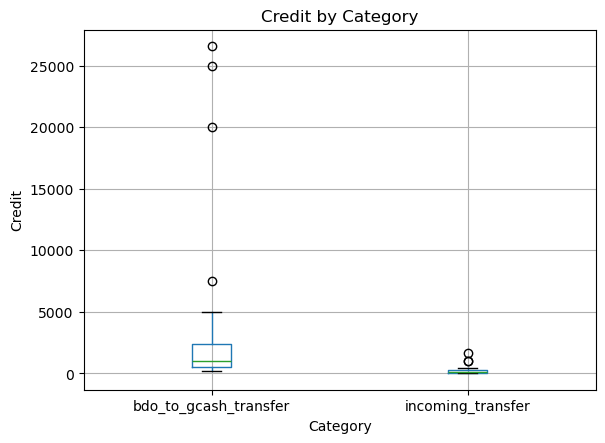

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_credit.boxplot(column="Credit", by="Category")
plt.title("Credit by Category")
plt.suptitle("")
plt.xlabel("Category")
plt.ylabel("Credit")
plt.show()


In [63]:
group_bdo = df_credit[df_credit['Category'] == 'bdo_to_gcash_transfer']['Credit']
group_incoming = df_credit[df_credit['Category'] == 'incoming_transfer']['Credit']

In [64]:
# Perform One-way ANOVA
f_statistic, p_value = stats.f_oneway(group_bdo, group_incoming)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Significant difference found (Reject H0)")
else:
    print("No significant difference found (Fail to reject H0)")

F-statistic: 6.3387
P-value: 0.0138
Significant difference found (Reject H0)


In [65]:
df_games = df.query("Category.str.contains('game_payment|school_fee_payment', case=False, na=False)", engine='python')

In [66]:
df_games.describe()

,Date and Time,Debit,Credit,Balance
count,54,54.000000,54.0,54.000000
mean,2025-06-28 16:03:27.777777920,1521.903519,0.0,683.563519
min,2025-02-04 10:21:00,10.640000,0.0,88.120000
25%,2025-03-14 02:30:45,94.050000,0.0,379.020000
50%,2025-06-15 01:53:00,216.590000,0.0,677.415000
75%,2025-09-20 18:17:30,331.050000,0.0,931.585000
max,2026-01-21 18:31:00,26523.600000,0.0,2036.080000
std,NaN,5345.156427,0.0,389.644850


In [67]:
df['Debit'].sum()

np.float64(161115.06)

In [68]:
df_games['Debit'].sum()

np.float64(82182.78999999998)

# Financial Overview

In [69]:
total_expense = df["Debit"].sum()
total_income = df["Credit"].sum()
net_cashflow = total_income - total_expense

n_tx = len(df)
n_exp = (df["Debit"] > 0).sum()
n_inc = (df["Credit"] > 0).sum()

print("Total transactions:", n_tx)
print("Expense transactions:", n_exp)
print("Income transactions:", n_inc)
print("Total expenses:", total_expense)
print("Total income:", total_income)
print("Net cash flow:", net_cashflow)


Total transactions: 255
Expense transactions: 174
Income transactions: 81
Total expenses: 161115.06
Total income: 161492.82
Net cash flow: 377.7600000000093


In [70]:
df["YearMonth"] = df["Date and Time"].dt.to_period("M").astype(str)

monthly = df.groupby("YearMonth").agg(
    monthly_expense=("Debit", "sum"),
    monthly_income=("Credit", "sum")
).reset_index()

monthly["net_cashflow"] = monthly["monthly_income"] - monthly["monthly_expense"]


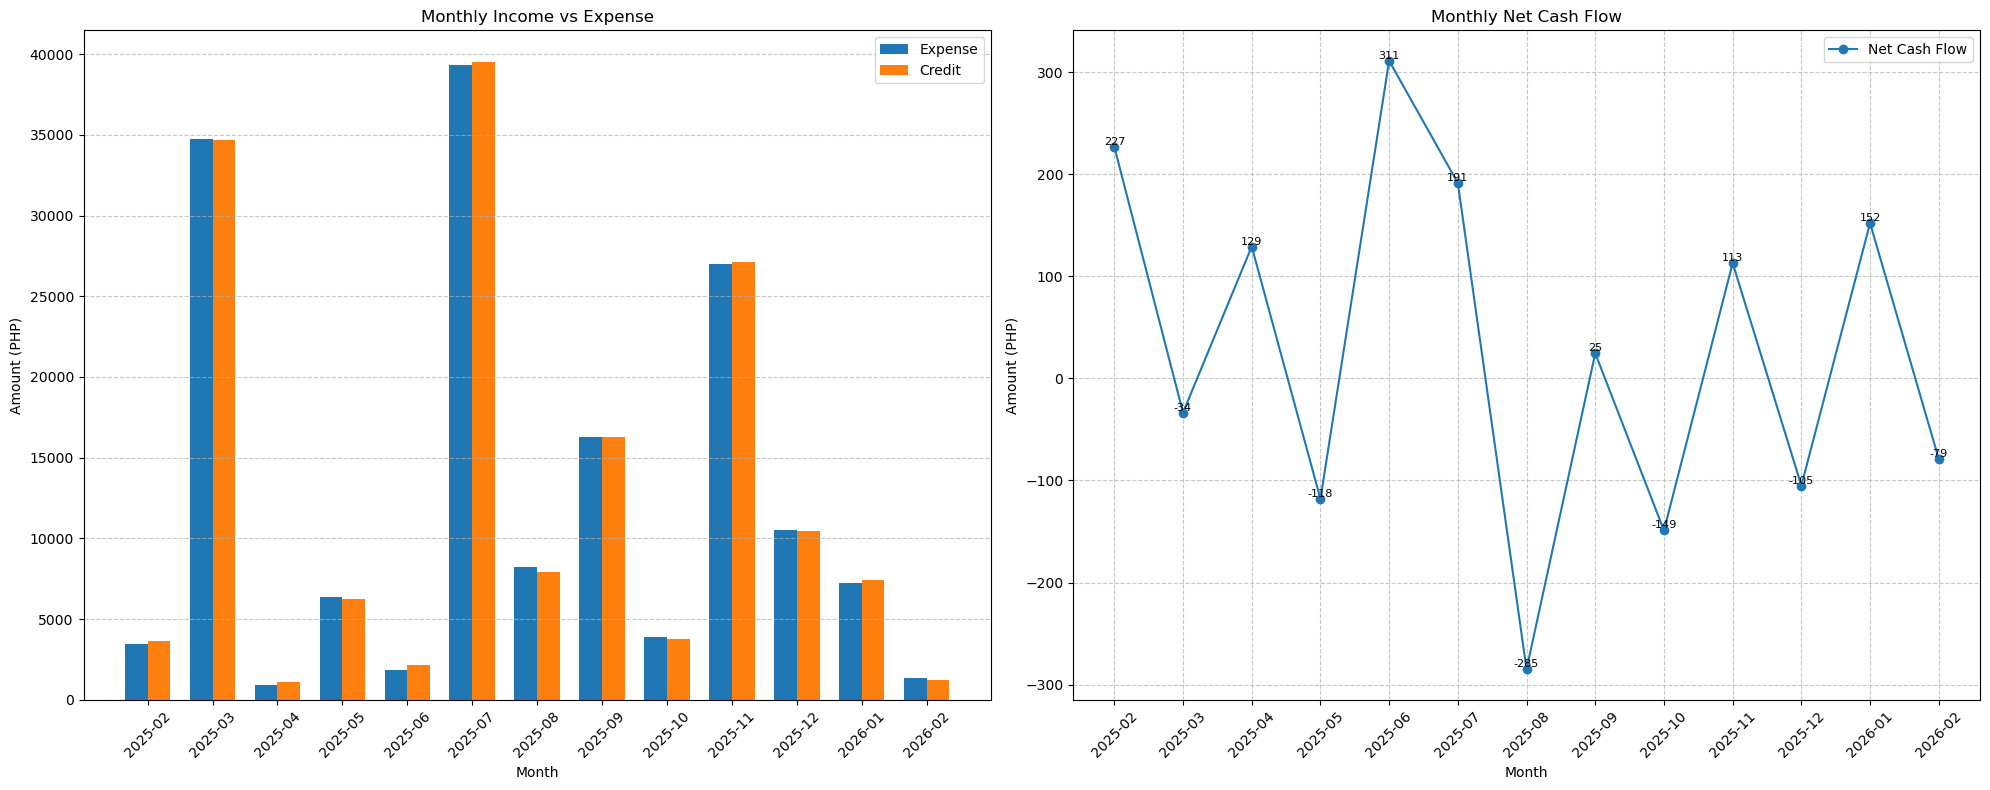

In [71]:
x = np.arange(len(monthly.index))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].bar(x - width/2, monthly["monthly_expense"], width, label="Expense")
axes[0].bar(x + width/2, monthly["monthly_income"], width, label="Credit")

axes[0].set_xticks(x)
axes[0].set_xticklabels(monthly["YearMonth"], rotation=45)
axes[0].set_title("Monthly Income vs Expense")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Amount (PHP)")
axes[0].legend()
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Net Cash Flow
axes[1].plot(monthly["YearMonth"], monthly["net_cashflow"], marker="o", label="Net Cash Flow")

# Add values to each dot
for i, row in monthly.iterrows():
    axes[1].text(row["YearMonth"], row["net_cashflow"], f'{row["net_cashflow"]:.0f}', 
             fontsize=8, ha='center', va='bottom')

axes[1].set_title("Monthly Net Cash Flow")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Amount (PHP)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(linestyle='--', alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()


In [72]:
monthly.sort_values(by="monthly_expense", ascending=False)

,YearMonth,monthly_expense,monthly_income,net_cashflow
5,2025-07,39308.78,39500.00,191.22
1,2025-03,34738.60,34705.00,-33.60
9,2025-11,26987.10,27100.00,112.90
7,2025-09,16260.49,16285.00,24.51
10,2025-12,10545.02,10440.00,-105.02
6,2025-08,8204.96,7920.00,-284.96
11,2026-01,7248.02,7400.00,151.98
3,2025-05,6368.05,6250.00,-118.05
8,2025-10,3914.00,3765.00,-149.00
0,2025-02,3430.10,3656.82,226.72


In [73]:
monthly.sort_values(by="monthly_income", ascending=False)

,YearMonth,monthly_expense,monthly_income,net_cashflow
5,2025-07,39308.78,39500.00,191.22
1,2025-03,34738.60,34705.00,-33.60
9,2025-11,26987.10,27100.00,112.90
7,2025-09,16260.49,16285.00,24.51
10,2025-12,10545.02,10440.00,-105.02
6,2025-08,8204.96,7920.00,-284.96
11,2026-01,7248.02,7400.00,151.98
3,2025-05,6368.05,6250.00,-118.05
8,2025-10,3914.00,3765.00,-149.00
0,2025-02,3430.10,3656.82,226.72


In [74]:
monthly.sort_values(by="net_cashflow", ascending=False)

,YearMonth,monthly_expense,monthly_income,net_cashflow
4,2025-06,1838.99,2150.00,311.01
0,2025-02,3430.10,3656.82,226.72
5,2025-07,39308.78,39500.00,191.22
11,2026-01,7248.02,7400.00,151.98
2,2025-04,941.95,1071.00,129.05
9,2025-11,26987.10,27100.00,112.90
7,2025-09,16260.49,16285.00,24.51
1,2025-03,34738.60,34705.00,-33.60
12,2026-02,1329.00,1250.00,-79.00
10,2025-12,10545.02,10440.00,-105.02


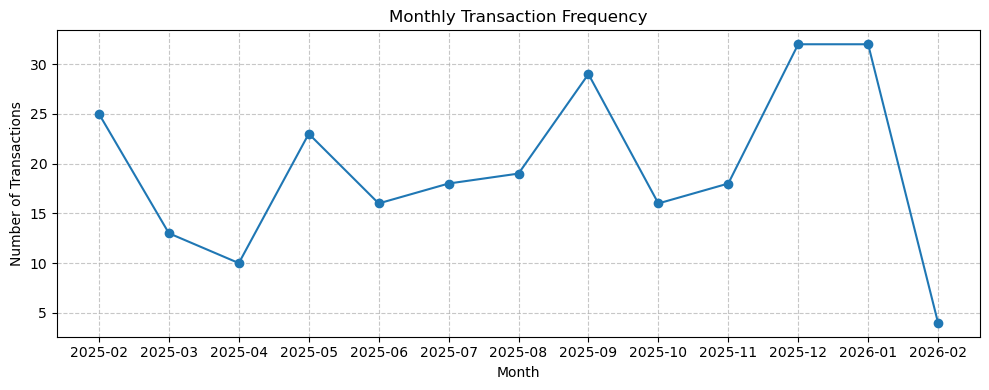

In [75]:
monthly_freq = df.groupby("YearMonth").size()

plt.figure(figsize=(10,4))
plt.plot(monthly_freq.index, monthly_freq.values, marker="o")
plt.title("Monthly Transaction Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [76]:
df[df["YearMonth"] == "2025-12"]["Category"].value_counts()

Category
buy_load                        13
bdo_to_gcash_transfer            5
apple_services_payment           5
outgoing_transfer                3
game_payment                     2
spotify_subscription_payment     1
food_delivery_payment            1
online_shopping_payment          1
incoming_transfer                1
Name: count, dtype: int64

# Expenses

In [77]:
cat_debit = (df[df["Debit"] > 0].groupby("Category")["Debit"].sum()
           .sort_values(ascending=False))

cat_debit.head(10)

Category
school_fee_payment              70152.00
outgoing_transfer               55857.00
game_payment                    12030.79
online_shopping_payment          7587.02
apple_services_payment           7532.00
buy_load                         3519.00
food_delivery_payment            3413.25
spotify_subscription_payment     1024.00
Name: Debit, dtype: float64

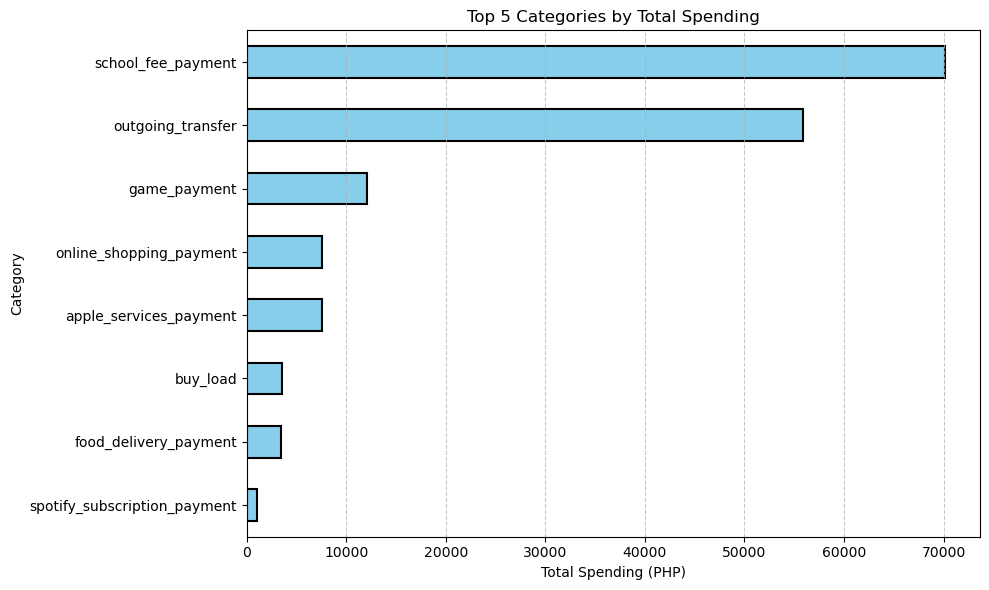

In [78]:
top_cat_debit = cat_debit.sort_values(ascending=True)

top_cat_debit.plot(
        kind='barh',
        figsize=(10,6),
        color='skyblue',
        edgecolor='black',
        linewidth=1.5,      
    )
plt.title("Top 5 Categories by Total Spending")
plt.xlabel("Total Spending (PHP)")
plt.ylabel("Category")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


In [79]:
df_expenses = df[df["Debit"] > 0]
df_expenses.head(5)

,Date and Time,Description,Debit,Credit,Balance,Category,YearMonth
1,2025-02-02 15:59:00,Transfer from 09287324237 to 09695514265,200.00,0.0,226.82,outgoing_transfer,2025-02
3,2025-02-04 10:21:00,Payment to MLBB,94.05,0.0,1132.77,game_payment,2025-02
4,2025-02-04 10:22:00,Payment to MLBB,94.05,0.0,1038.72,game_payment,2025-02
5,2025-02-04 10:23:00,Payment to MLBB,94.05,0.0,944.67,game_payment,2025-02
6,2025-02-08 16:12:00,Payment to MLBB,94.05,0.0,850.62,game_payment,2025-02


In [80]:
df_expenses["Debit"].describe()

count      174.000000
mean       925.948621
std       3157.338938
min         10.640000
25%         86.000000
50%        161.235000
75%        491.040000
max      26523.600000
Name: Debit, dtype: float64

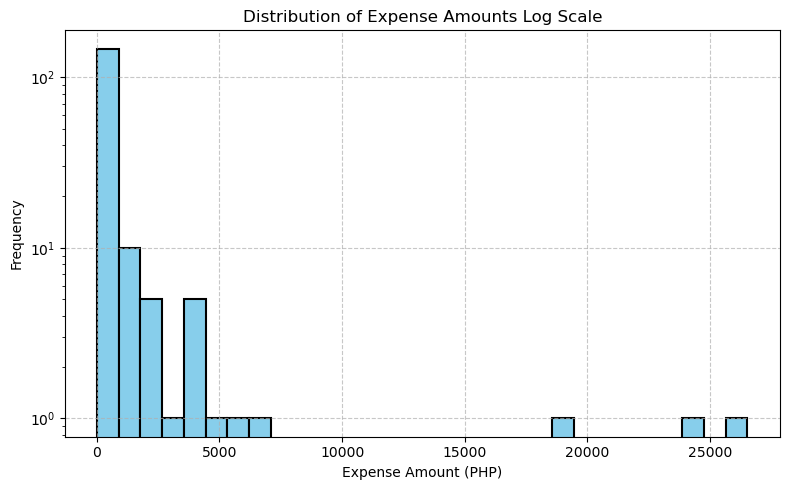

In [81]:
plt.figure(figsize=(8,5))
plt.hist(df_expenses["Debit"], bins=30,
        color='skyblue',
        edgecolor='black',
        linewidth=1.5
        )
plt.title("Distribution of Expense Amounts Log Scale")
plt.yscale("log")
plt.xlabel("Expense Amount (PHP)")
plt.ylabel("Frequency")
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 5 Categories by Frequency')

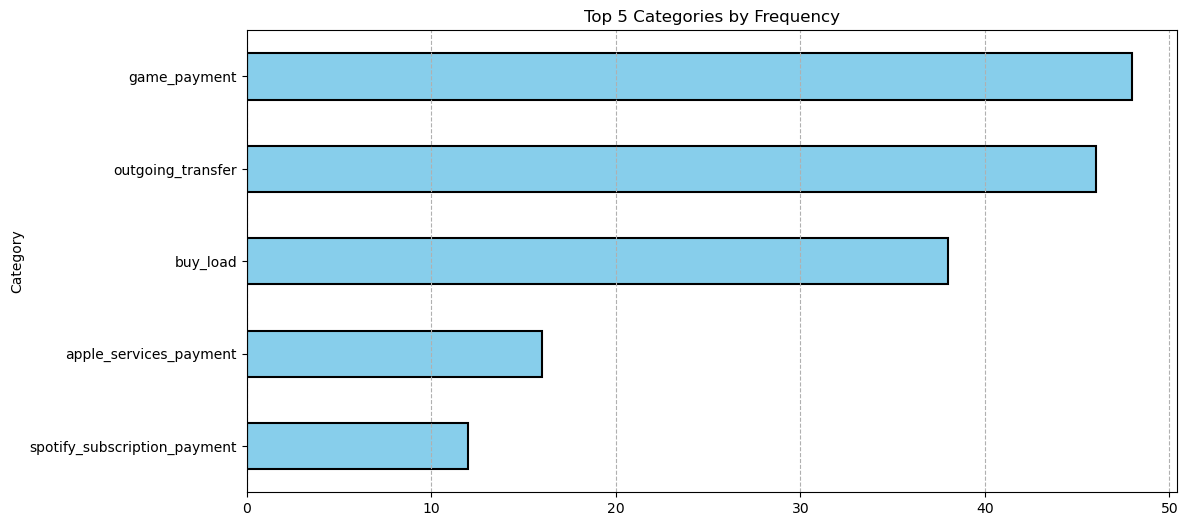

In [82]:
top5_expenses_by_category = df_expenses["Category"].value_counts().head(5).sort_values(ascending=True)

top5_expenses_by_category.plot(
        kind='barh',
        figsize=(12,6),
        color='skyblue',
        edgecolor='black',
        linewidth=1.5,     
         
    )
plt.grid(axis='x', linestyle='--')

plt.title("Top 5 Categories by Frequency")

In [83]:
top5_categories = df_expenses["Category"].value_counts().head(5).index
top5_categories

Index(['game_payment', 'outgoing_transfer', 'buy_load',
       'apple_services_payment', 'spotify_subscription_payment'],
      dtype='object', name='Category')

In [84]:
df_expenses[df_expenses["Category"].isin(top5_categories)] \
    .groupby("Category")["Debit"] \
    .describe() \
    .sort_values(by="count", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
game_payment,48.0,250.641458,231.140710,10.64,94.05,185.875,280.0,1028.96
outgoing_transfer,46.0,1214.282609,1667.505011,30.00,138.00,300.000,1835.0,7000.00
buy_load,38.0,92.605263,60.150954,22.00,55.50,61.000,114.0,249.00
apple_services_payment,16.0,470.750000,335.822274,49.00,164.25,549.000,649.0,999.00
spotify_subscription_payment,12.0,85.333333,26.721912,75.00,75.00,75.000,85.0,169.00


In [117]:
top_3_expenses = df_expenses["Category"].unique()[:3]
top_3_expenses

array(['outgoing_transfer', 'game_payment', 'buy_load'], dtype=object)

<Figure size 800x500 with 0 Axes>

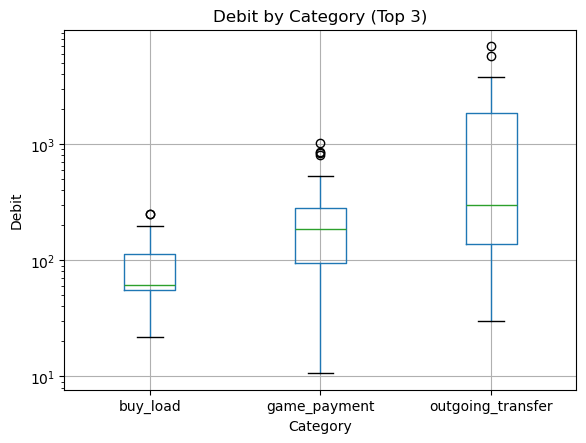

In [118]:
df_top3_expenses = df_expenses[df_expenses["Category"].isin(top_3_expenses)]

plt.figure(figsize=(8, 5))
df_top3_expenses.boxplot(column="Debit", by="Category")
plt.title("Debit by Category (Top 3)")
plt.suptitle("")
plt.yscale("log")
plt.xlabel("Category")
plt.ylabel("Debit")
plt.show()

### outgoing_payment

In [126]:
df_outgoing_payment = df_expenses[df_expenses["Category"] == "outgoing_transfer"].drop(columns=["Credit", "Balance"])

df_outgoing_payment.sort_values(by="Debit", ascending=False).head(5)

,Date and Time,Description,Debit,Category,YearMonth
104,2025-07-31 13:29:00,Transfer from 09287324237 to 09260556405,7000.0,outgoing_transfer,2025-07
117,2025-08-23 16:52:00,Transfer from 09287324237 to 09608906763,5700.0,outgoing_transfer,2025-08
97,2025-07-14 16:13:00,Transfer from 09287324237 to 09608906763,3800.0,outgoing_transfer,2025-07
64,2025-05-26 17:11:00,Transfer from 09287324237 to 09608906763,3800.0,outgoing_transfer,2025-05
37,2025-03-29 14:18:00,Transfer from 09287324237 to 09608906763,3800.0,outgoing_transfer,2025-03


### game_payment

In [125]:
df_game_payment = df_expenses[df_expenses["Category"] == "game_payment"].drop(columns=["Credit", "Balance"])

df_game_payment.sort_values(by="Debit", ascending=False).head(5)

,Date and Time,Description,Debit,Category,YearMonth
106,2025-08-01 12:53:00,Payment to LootBar,1028.96,game_payment,2025-08
78,2025-06-13 12:06:00,Payment to KURO GAMES,846.99,game_payment,2025-06
183,2025-11-17 14:30:00,Payment to Honkai Impact 3,830.00,game_payment,2025-11
92,2025-07-11 14:19:00,Payment to COGNOSPHERE PTE. LTD,799.00,game_payment,2025-07
175,2025-11-07 16:57:00,Payment to MLBB,532.00,game_payment,2025-11


### buy_load

In [127]:
df_buy_load = df_expenses[df_expenses["Category"] == "buy_load"].drop(columns=["Credit", "Balance"])

df_buy_load.sort_values(by="Debit", ascending=False).head(5)

,Date and Time,Description,Debit,Category,YearMonth
168,2025-10-25 10:54:00,Payment to Smart GigaLife,249.0,buy_load,2025-10
192,2025-12-11 06:06:00,Payment to Smart GigaLife,249.0,buy_load,2025-12
44,2025-04-14 10:37:00,Payment to Smart GigaLife,199.0,buy_load,2025-04
71,2025-06-02 10:13:00,Payment to Smart GigaLife,199.0,buy_load,2025-06
217,2025-12-31 09:39:00,Buy Load Transaction for 09287324237,188.0,buy_load,2025-12


In [120]:
from scipy.stats import f_oneway

groups = [
    group["Debit"].values
    for name, group in df_expenses.groupby("Category")
]

f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Significant difference found (Reject H0)")
else:
    print("No significant difference found (Fail to reject H0)")

F-statistic: 18.738379896542018
p-value: 2.734898808045962e-18
Significant difference found (Reject H0)


## Largest Expense Events

In [85]:
df_expenses[df_expenses["Debit"] == df_expenses["Debit"].min()]

,Date and Time,Description,Debit,Credit,Balance,Category,YearMonth
141,2025-09-20 18:18:00,Payment to MLBB,10.64,0.0,813.9,game_payment,2025-09


In [86]:
df_expenses[df_expenses["Debit"] == df_expenses["Debit"].max()]

,Date and Time,Description,Debit,Credit,Balance,Category,YearMonth
27,2025-03-10 14:19:00,Payment to National University,26523.6,0.0,242.12,school_fee_payment,2025-03


## Top 10 Expenses

In [87]:
df_expenses.sort_values(by="Debit", ascending=False).drop(columns=["Credit", "Balance"]).head(10)

,Date and Time,Description,Debit,Category,YearMonth
27,2025-03-10 14:19:00,Payment to National University,26523.6,school_fee_payment,2025-03
94,2025-07-11 16:02:00,Payment to Bancnet P2M Send,24039.6,school_fee_payment,2025-07
172,2025-11-03 15:24:00,Payment to Bancnet P2M Send,18763.8,school_fee_payment,2025-11
104,2025-07-31 13:29:00,Transfer from 09287324237 to 09260556405,7000.0,outgoing_transfer,2025-07
117,2025-08-23 16:52:00,Transfer from 09287324237 to 09608906763,5700.0,outgoing_transfer,2025-08
128,2025-09-08 09:31:00,Payment to SHOPEE,5224.0,online_shopping_payment,2025-09
64,2025-05-26 17:11:00,Transfer from 09287324237 to 09608906763,3800.0,outgoing_transfer,2025-05
97,2025-07-14 16:13:00,Transfer from 09287324237 to 09608906763,3800.0,outgoing_transfer,2025-07
143,2025-09-23 11:31:00,Transfer from 09287324237 to 09608906763,3800.0,outgoing_transfer,2025-09
31,2025-03-17 18:15:00,Transfer from 09287324237 to 09608906763,3800.0,outgoing_transfer,2025-03


# Income

In [88]:
cat_credit = (df[df["Credit"] > 0].groupby("Category")["Credit"].sum()
           .sort_values(ascending=False))

cat_credit.head(10)

Category
bdo_to_gcash_transfer    154950.00
incoming_transfer          6542.82
Name: Credit, dtype: float64

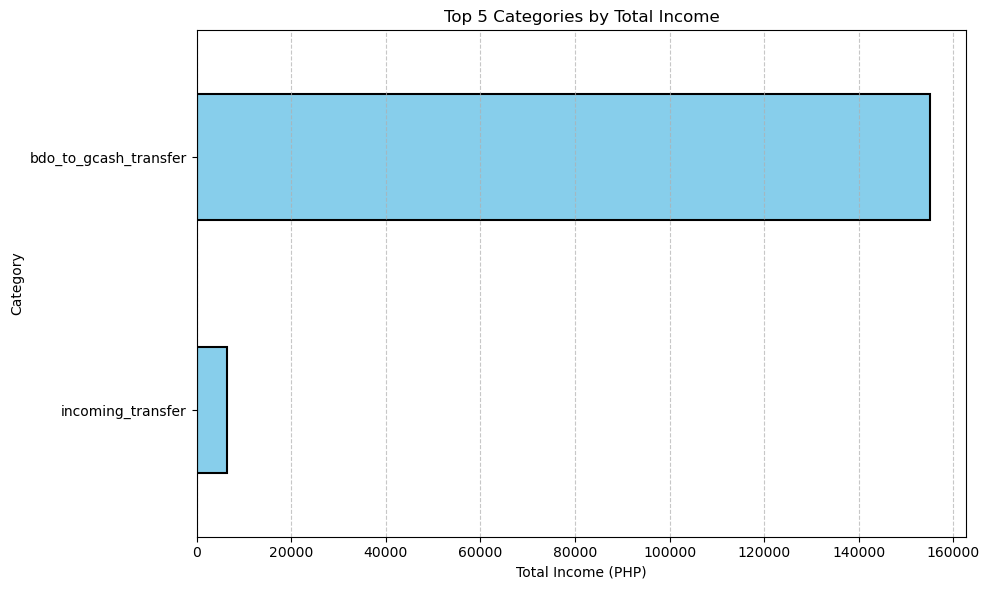

In [89]:
top_cat_credit = cat_credit.sort_values(ascending=True)

top_cat_credit.plot(
        kind='barh',
        figsize=(10,6),
        color='skyblue',
        edgecolor='black',
        linewidth=1.5,      
    )
plt.title("Top 5 Categories by Total Income")
plt.xlabel("Total Income (PHP)")
plt.ylabel("Category")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


In [90]:
df_income = df[df["Credit"] > 0]
df_income.head(5)

,Date and Time,Description,Debit,Credit,Balance,Category,YearMonth
0,2025-02-02 15:58:00,STARTING BALANCE,0.0,426.82,426.82,incoming_transfer,2025-02
2,2025-02-04 10:21:00,"Received GCash from BDO Unibank, Inc. with acc...",0.0,1000.00,1226.82,bdo_to_gcash_transfer,2025-02
13,2025-02-15 17:26:00,Transfer from 09944254289 to 09287324237,0.0,300.00,581.37,incoming_transfer,2025-02
16,2025-02-19 14:34:00,"Received GCash from BDO Unibank, Inc. with acc...",0.0,1500.00,1533.27,bdo_to_gcash_transfer,2025-02
20,2025-02-21 11:47:00,"Received GCash from BDO Unibank, Inc. with acc...",0.0,250.00,262.72,bdo_to_gcash_transfer,2025-02


In [91]:
df_income["Credit"].describe()

count       81.000000
mean      1993.738519
std       4572.411133
min          5.000000
25%        200.000000
50%        700.000000
75%       1640.000000
max      26600.000000
Name: Credit, dtype: float64

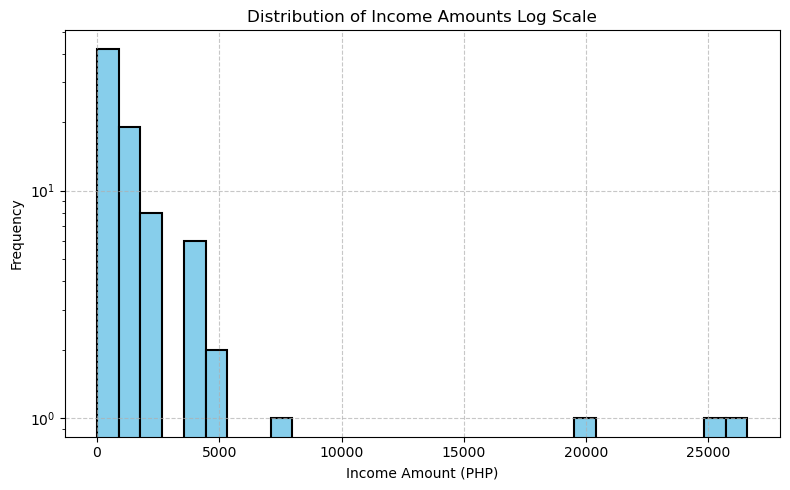

In [92]:
plt.figure(figsize=(8,5))
plt.hist(df_income["Credit"], bins=30,
        color='skyblue',
        edgecolor='black',
        linewidth=1.5
        )
plt.title("Distribution of Income Amounts Log Scale")
plt.yscale("log")
plt.xlabel("Income Amount (PHP)")
plt.ylabel("Frequency")
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 5 Categories by Frequency')

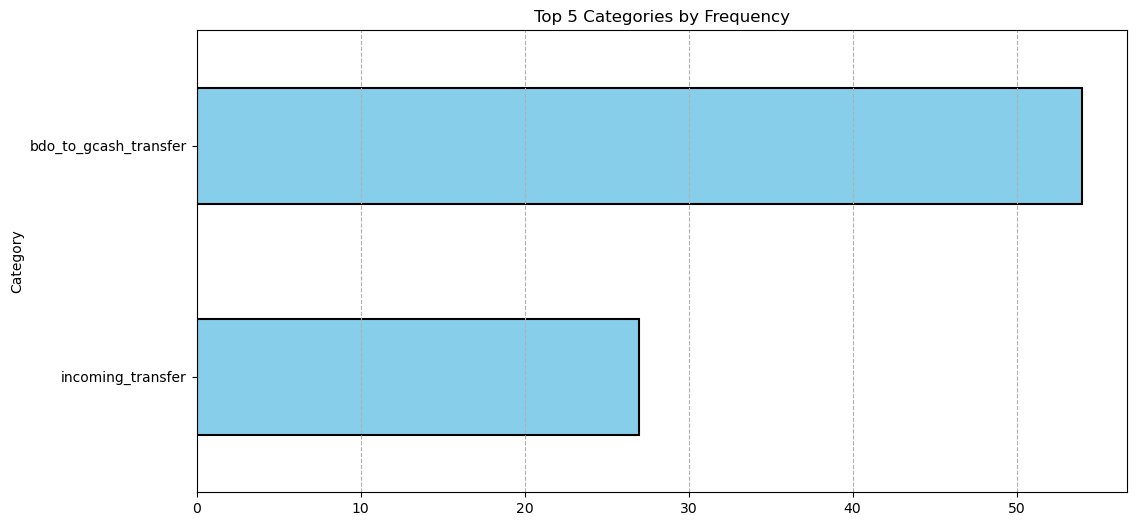

In [93]:
top5_income_by_category = df_income["Category"].value_counts().head(5).sort_values(ascending=True)

top5_income_by_category.plot(
        kind='barh',
        figsize=(12,6),
        color='skyblue',
        edgecolor='black',
        linewidth=1.5,     
         
    )
plt.grid(axis='x', linestyle='--')

plt.title("Top 5 Categories by Frequency")

In [94]:
credit_categories = df_credit["Category"].value_counts().index
credit_categories

Index(['bdo_to_gcash_transfer', 'incoming_transfer'], dtype='object', name='Category')

In [95]:
df_credit[df_credit["Category"].isin(credit_categories)] \
    .groupby("Category")["Credit"] \
    .describe() \
    .sort_values(by="count", ascending=False)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
bdo_to_gcash_transfer,54.0,2869.444444,5398.308756,200.0,500.0,1000.0,2400.0,26600.0
incoming_transfer,27.0,242.326667,382.900949,5.0,50.0,100.0,250.0,1640.0


In [122]:
df_income.groupby("Category")["Credit"]

In [121]:
plt.figure(figsize=(8, 5))
df_income.groupby("Category")["Credit"].boxplot(column="Credit", by="Category")
plt.title("Credit by Category (Top 3)")
plt.suptitle("")
plt.yscale("log")
plt.xlabel("Category")
plt.ylabel("Credit")
plt.show()

AttributeError: 'SeriesGroupBy' object has no attribute 'boxplot'

<Figure size 800x500 with 0 Axes>

## Largest Income Events

In [96]:
df_credit[df_credit["Credit"] == df_credit["Credit"].min()]

,Date and Time,Description,Debit,Credit,Balance,Category
22,2025-02-21 11:49:00,Transfer from 09473577664 to 09287324237,0.0,5.0,392.72,incoming_transfer


In [97]:
df_credit[df_credit["Credit"] == df_credit["Credit"].max()]

,Date and Time,Description,Debit,Credit,Balance,Category
26,2025-03-10 14:18:00,"Received GCash from BDO Unibank, Inc. with acc...",0.0,26600.0,26765.72,bdo_to_gcash_transfer


##  Top 10 Income

In [98]:
df_credit.sort_values(by="Credit", ascending=False).drop(columns=["Debit", "Balance"]).head(10)

,Date and Time,Description,Credit,Category
26,2025-03-10 14:18:00,"Received GCash from BDO Unibank, Inc. with acc...",26600.0,bdo_to_gcash_transfer
93,2025-07-11 16:01:00,"Received GCash from BDO Unibank, Inc. with acc...",25000.0,bdo_to_gcash_transfer
171,2025-11-03 15:22:00,"Received GCash from BDO Unibank, Inc. with acc...",20000.0,bdo_to_gcash_transfer
103,2025-07-31 13:26:00,"Received GCash from BDO Unibank, Inc. with acc...",7500.0,bdo_to_gcash_transfer
127,2025-09-08 09:30:00,"Received GCash from BDO Unibank, Inc. with acc...",5000.0,bdo_to_gcash_transfer
116,2025-08-23 16:50:00,"Received GCash from BDO Unibank, Inc. with acc...",4500.0,bdo_to_gcash_transfer
30,2025-03-17 18:14:00,"Received GCash from BDO Unibank, Inc. with acc...",4000.0,bdo_to_gcash_transfer
96,2025-07-14 16:12:00,"Received GCash from BDO Unibank, Inc. with acc...",4000.0,bdo_to_gcash_transfer
142,2025-09-23 11:30:00,"Received GCash from BDO Unibank, Inc. with acc...",4000.0,bdo_to_gcash_transfer
63,2025-05-26 17:10:00,"Received GCash from BDO Unibank, Inc. with acc...",4000.0,bdo_to_gcash_transfer


# Spending Behavior

In [99]:
daily_spending = df.groupby(df["Date and Time"].dt.date)["Debit"].sum()
daily_spending.head()


Date and Time
2025-02-02    200.00
2025-02-04    282.15
2025-02-08    282.15
2025-02-11     99.00
2025-02-15    755.25
Name: Debit, dtype: float64

In [100]:
daily_spending.describe()

count      137.000000
mean      1176.022336
std       3591.048901
min          0.000000
25%         75.000000
50%        249.000000
75%        599.000000
max      26523.600000
Name: Debit, dtype: float64

In [101]:
df_expenses[df_expenses["Debit"] == df_expenses["Debit"].min()]

,Date and Time,Description,Debit,Credit,Balance,Category,YearMonth
141,2025-09-20 18:18:00,Payment to MLBB,10.64,0.0,813.9,game_payment,2025-09


In [102]:
spending_days = (daily_spending > 0).sum()
total_days = len(daily_spending)

spending_days, total_days


(np.int64(123), 137)